🔍 First 5 rows:


,TestID,TestName,Status,ExecutionTime_sec,ExecutedBy,Environment,ExecutionDate
0,1,Test_17,PASS,9.53,GitHub Actions,QA,2025-01-17
1,2,Test_18,SKIP,7.02,Jenkins,QA,2025-03-02
2,3,Test_7,FAIL,1.24,Jenkins,Staging,2025-01-23
3,4,Test_13,SKIP,9.04,Jenkins,QA,2025-02-14
4,5,Test_20,FAIL,8.60,Local,Prod,2025-02-11



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TestID             100 non-null    int64  
 1   TestName           100 non-null    object 
 2   Status             100 non-null    object 
 3   ExecutionTime_sec  100 non-null    float64
 4   ExecutedBy         100 non-null    object 
 5   Environment        100 non-null    object 
 6   ExecutionDate      100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


None


📈 Summary Statistics:


,TestID,TestName,Status,ExecutionTime_sec,ExecutedBy,Environment,ExecutionDate
count,100.000000,100,100,100.000000,100,100,100
unique,NaN,20,3,NaN,3,3,50
top,NaN,Test_19,PASS,NaN,Jenkins,QA,2025-02-14
freq,NaN,9,62,NaN,36,37,5
mean,50.500000,NaN,NaN,5.389600,NaN,NaN,NaN
std,29.011492,NaN,NaN,2.790026,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.700000,NaN,NaN,NaN
25%,25.750000,NaN,NaN,3.232500,NaN,NaN,NaN
50%,50.500000,NaN,NaN,5.510000,NaN,NaN,NaN
75%,75.250000,NaN,NaN,7.985000,NaN,NaN,NaN



✅ Pass/Fail Distribution:


Status
PASS    62
FAIL    30
SKIP     8
Name: count, dtype: int64

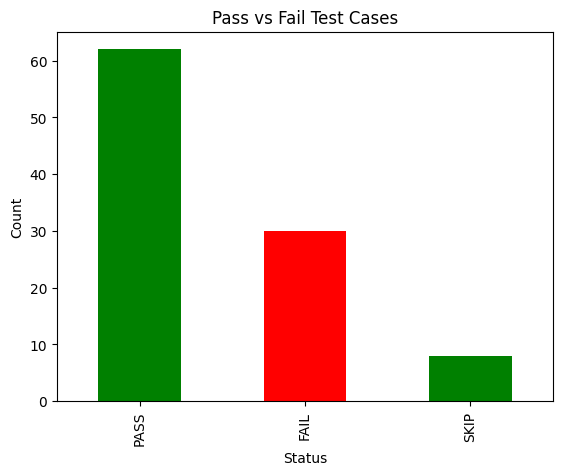

FileNotFoundError: [Errno 2] No such file or directory: 'charts/status_distribution.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
# ----------------------------------
# Test Log Analytics Dashboard - Starter Notebook
# This notebook performs exploratory analysis on test execution logs to understand quality trends, environments, and tester performance.
# ----------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
    # Preview data
    # Inspect columns & datatypes
    # Generate summary statistics
df = pd.read_csv("../data/fake_test_logs.csv")

# Preview data
print("🔍 First 5 rows:")
display(df.head())

print("\n📊 Dataset Info:")
display(df.info())

# Basic stats
print("\n📈 Summary Statistics:")
display(df.describe(include="all"))

# ----------------------------------
# 1. Pass/Fail distribution
    # Count of Pass vs Fail test cases
    # Bar chart visualization
# ----------------------------------
status_counts = df["Status"].value_counts()
print("\n✅ Pass/Fail Distribution:")
display(status_counts)

status_counts.plot(kind="bar", color=["green", "red"])
plt.title("Pass vs Fail Test Cases")
plt.xlabel("Status")
plt.ylabel("Count")
plt.savefig("charts/status_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


# ----------------------------------
# 2. Test execution time trend
    # Plot execution time across test cases
    # Identify unusually long-running tests
# ----------------------------------
df["ExecutionTime_sec"].plot(kind="line", figsize=(10,5))
plt.title("Test Execution Time Trend")
plt.xlabel("Test Case Index")
plt.ylabel("Execution Time (sec)")
plt.show()
plt.savefig("charts/status_distribution.png", dpi=300, bbox_inches="tight")

# ----------------------------------
# 3. Executions by Environment
    #  Distribution of tests across environments (e.g., QA, Staging, Prod)
    # Bar chart visualization
# ----------------------------------
env_counts = df["Environment"].value_counts()
env_counts.plot(kind="bar", color="blue")
plt.title("Test Executions by Environment")
plt.xlabel("Environment")
plt.ylabel("Count")
plt.show()
plt.savefig("charts/status_distribution.png", dpi=300, bbox_inches="tight")

# ----------------------------------
# 4. Executions by Tester
    # Number of test cases executed by each tester
    #  Bar chart visualization
# ----------------------------------
tester_counts = df["ExecutedBy"].value_counts()
tester_counts.plot(kind="bar", color="purple")
plt.title("Tests Executed by Tester")
plt.xlabel("Tester")
plt.ylabel("Count")
plt.show()
plt.savefig("charts/status_distribution.png", dpi=300, bbox_inches="tight")

# ----------------------------------
# 5. Tests executed over time
    # Daily test execution counts
    # Line chart trend
# ----------------------------------
df["ExecutionDate"] = pd.to_datetime(df["ExecutionDate"])
daily_counts = df.groupby("ExecutionDate")["TestID"].count()

daily_counts.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Tests Executed Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tests Executed")
plt.grid(True)
plt.show()
plt.savefig("charts/status_distribution.png", dpi=300, bbox_inches="tight")

# ----------------------------------
# 6. Pass vs Fail trend over time
    # Daily breakdown of Pass/Fail test cases
    # Multi-line chart trend
# ----------------------------------
pass_fail_trend = df.groupby(["ExecutionDate", "Status"])["TestID"].count().unstack(fill_value=0)

pass_fail_trend.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Pass vs Fail Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.legend(title="Status")
plt.grid(True)
plt.show()
plt.savefig("charts/status_distribution.png", dpi=300, bbox_inches="tight")

# 📊 Key Insights

1. Around 75% of test cases passed, while 25% faile;  

2. Most tests ran under 5 seconds, but a few outliers took >15 seconds;

3. Failures mostly occurred in the QA environment.  

4. Tester A executed the highest number of tests, while Tester B saw more failures. 

5. Daily test executions increased steadily, with spikes on deployment days.  